<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana8/module5_python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Rodrigo Ildefonso Roman Guzman|A01794225|María de la Paz Rico Fernández|Semana 7 (Noviembre 1 2022)</h1>

<h2>Data Analysis with Python <b>Module 4</b><h2/>

<h3>Model Development</h3>
<p>A model is a mathematical equation used to predict a value given one or more values (relating one or more independent variables to make a prediction)</p>

<h3>Linear Regression</h3>
<p>Refers to one independent variable to make a prediction</p>
$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$
<h4>Linear function</h4>
$$
Yhat = a + b  X
$$
<p>Where <i>a</i> is the intercept and <i>b</i> is the coeficient or slope of the linear function</p>

In [ ]:
#Example of linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Download the data set
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

#We create a linear regression model
lm = LinearRegression()

#We want to predict the price of a car based on highway-mpg
X = df[['highway-mpg']]
Y = df['price']

#Fit the linear model
lm.fit(X,Y)

#Instance of a prediction
Yhat=lm.predict(X)
print(Yhat[0:5])   

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [ ]:
#Check the y intercept
print('This is the y intercet: ',lm.intercept_)
#Check the slope
print('This is the slope: ',lm.coef_)

This is the y intercet:  38423.3058581574
This is the slope:  [-821.73337832]


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>
<p>Notice that what we predict is the <i>a</i> and <i>b</i> of the equation</p>

<h3>Multiple Linear Regression</h3>
<ul>
<li>One continuos variable <i>Y</i></li>
<li>Two or more predictor <i>X</i> variables</li>
</ul>
<p>This works for the case where we want to take under consideration more than one variable. For the example of the car price it could be 'curb-weight', 'engine-size', etc</p>
<br>
<h4>The equation</h4>
$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

<p>
Notice that we have more tahn one coeficient.
</p>



In [ ]:
#Select the variables that we want
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

#Check for the Y intercept
print('Y intercept',lm.intercept_)

#Check for the coeficients vector
print('Y intercept',lm.coef_)


Y intercept -15806.62462632922
Y intercept [53.49574423  4.70770099 81.53026382 36.05748882]


<p>This is how the equation will look like</p>
<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<h2>Model Evaluation with visualization</h2>
<p>Allows us to undestand how well our model fits the data</p>


(0.0, 48161.672162071234)

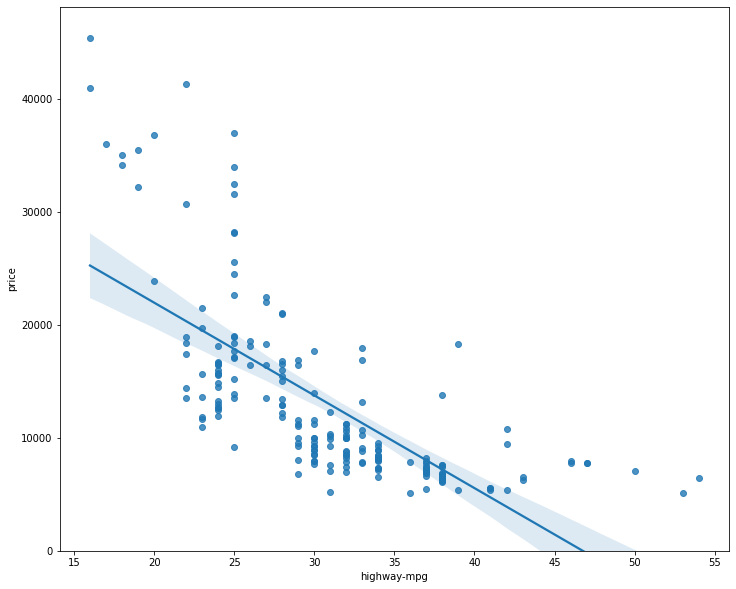

In [ ]:
import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>The price is negatively correlated to highway-mpg because the slope is negative</p>

(0.0, 47414.1)

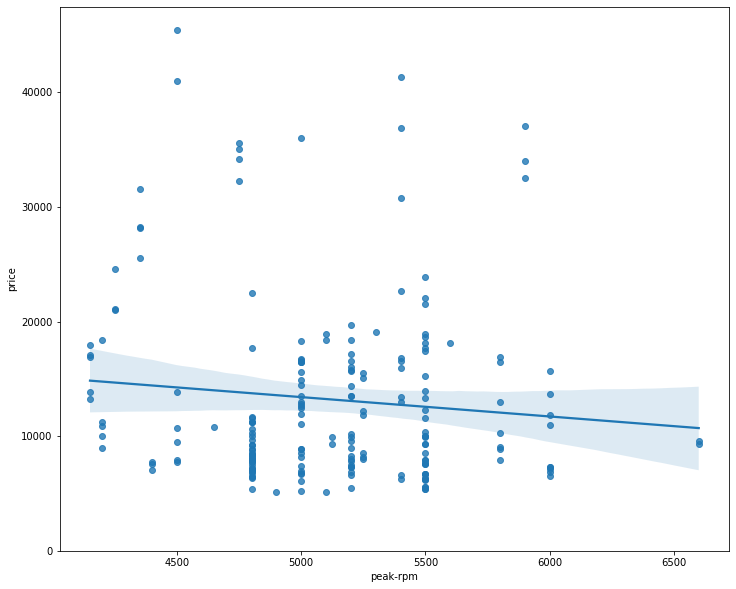

In [ ]:
#Same plot but for peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)


<p>For this new feature the model does not help a lot</p>

<h3>Residual Plot</h3>
<p>Is a way to visualize the variance of the data. It calculates the difference between <i>y</i> and <i>yhat</i>. The residual is the distance from the data point to the fitted regression line</p>
<p>Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data</p>

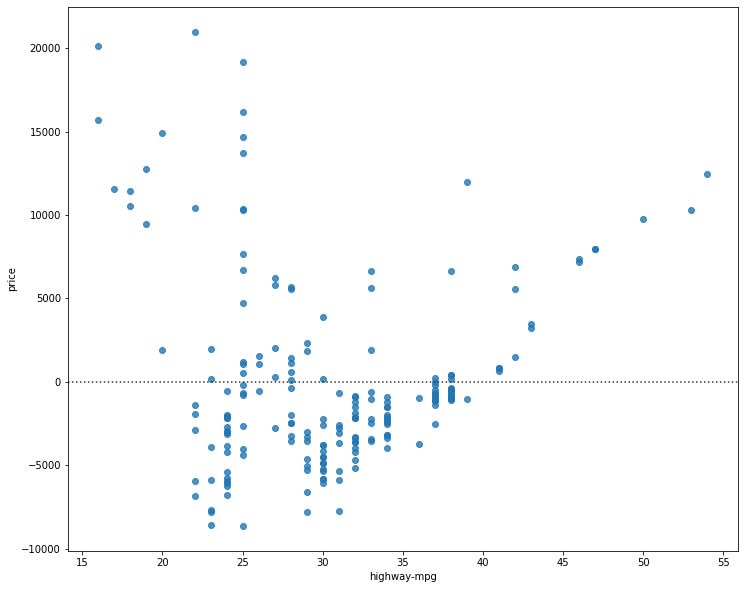

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<p>Notice how the graph has a curve like shape which suggest that we can use a better model to fit the data.</p>

<h3>Multiple Linear Regression</h3>
<p>Given that we have multiple dimensions we can't visualize the data as we did for linear regressions. Instead we have to get the distribution plot.This way we can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values</p>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


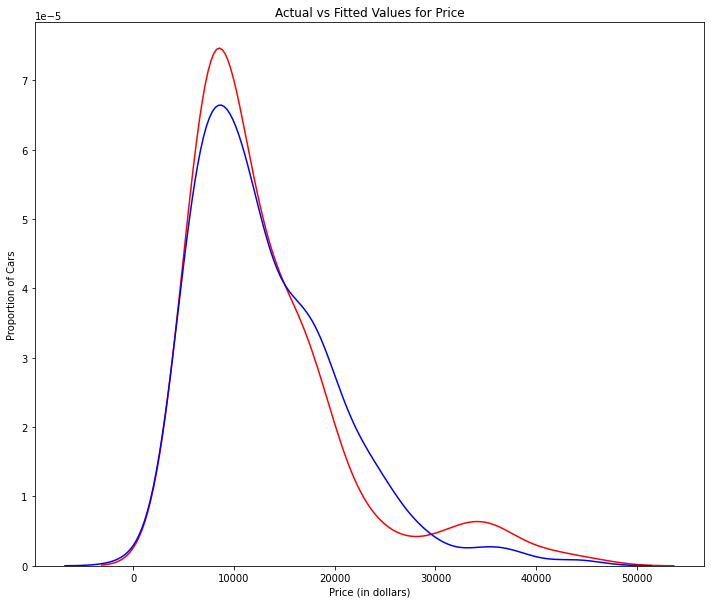

In [ ]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


<h2>Polynomial Regression and Pipelines</h2>

<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>
<ul>
<li>Transform our data into polynomial</li>
<li>Use linear regression to fit the parameter</li>
</ul>
<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [ ]:
#Define a function for plotting a polinomial equation
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


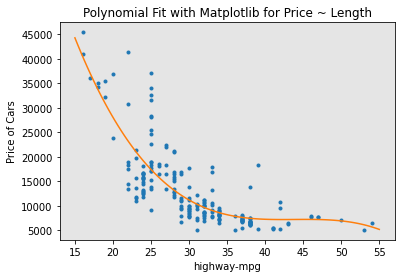

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

<p>We can use a library for facilitating the work</p>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)
#lets compare
print('Shape of linear regression: ',Z.shape)
print('Shape of polynomial regression: ',Z_pr.shape)

Shape of linear regression:  (201, 4)
Shape of polynomial regression:  (201, 15)


<h2>Pipeline</h2>
<p>Simplifies the process of preparing our data</p>


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

 #First we create the pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#Input the pipeline to the Pipe function

pipe=Pipeline(Input)
pipe

#Continue the process of fitting and predicting
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<h2>How to determine if a model is a good fit??</h2>
<p>
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit (close to 1)</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>
